In [ ]:
import tensorflow as tf

In [ ]:
import os
import zipfile

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-06-19 18:47:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.86MB/s    in 50s     

2021-06-19 18:48:48 (6.16 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    horizontal_flip=True,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    fill_mode = 'nearest',
                                    validation_split=0.4,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2)
 
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                                                    base_dir,  # direktori dari data latih
                                                    target_size=(100, 150),  # mengubah resolusi seluruh gambar menjadi 100x150 piksel karena dataset ukuran 200x300
                                                    batch_size=20,
                                                    class_mode='sparse', # karena masalah ini berupa klasifikasi 3 kelas maka menggunakan class_mode = 'sparse'
                                                    shuffle = True,
                                                    subset = 'training'
                                                    ) 
 
validation_generator = test_datagen.flow_from_directory(
                                                        base_dir, # direktori dari data validasi
                                                        target_size=(100, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel karena dataset ukuran 200x300
                                                        batch_size=20, 
                                                        class_mode='sparse', # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'sparse'
                                                        shuffle = True,
                                                        subset = 'validation'
                                                        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])

In [ ]:
# compile model dengan 'adam' optimizer dan loss function 'sparse_categorical_crossentropy' 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= tf.optimizers.Adam(),
              metrics=['accuracy']
              )

In [ ]:
# melatih model dengan model.fit 
history = model.fit(
          train_generator,
          steps_per_epoch=20,  # batch yang akan dieksekusi setiap epoch
          epochs=35, 
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=3,  # batch yang akan dieksekusi pada setiap epoch
          verbose=1)

Epoch 1/35
20/20 [==============================] - 17s 814ms/step - loss: 1.1155 - accuracy: 0.3375 - val_loss: 1.0886 - val_accuracy: 0.4333
Epoch 2/35
20/20 [==============================] - 16s 790ms/step - loss: 1.0952 - accuracy: 0.3200 - val_loss: 1.1036 - val_accuracy: 0.3667
Epoch 3/35
20/20 [==============================] - 16s 797ms/step - loss: 1.0959 - accuracy: 0.3800 - val_loss: 1.0825 - val_accuracy: 0.4000
Epoch 4/35
20/20 [==============================] - 16s 796ms/step - loss: 1.0616 - accuracy: 0.4025 - val_loss: 0.8995 - val_accuracy: 0.6833
Epoch 5/35
20/20 [==============================] - 16s 793ms/step - loss: 0.8342 - accuracy: 0.5939 - val_loss: 0.5732 - val_accuracy: 0.7500
Epoch 6/35
20/20 [==============================] - 16s 795ms/step - loss: 0.7594 - accuracy: 0.6675 - val_loss: 0.4930 - val_accuracy: 0.8833
Epoch 7/35
20/20 [==============================] - 16s 783ms/step - loss: 0.7201 - accuracy: 0.6777 - val_loss: 0.4736 - val_accuracy: 0.8167

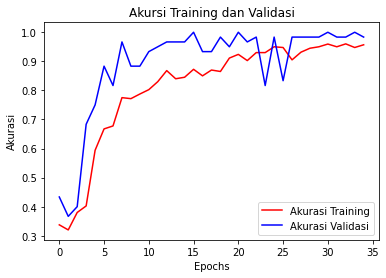

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
akurasi = history.history['accuracy']
val_akurasi = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(akurasi))

plt.plot(epochs, akurasi, 'r', label='Akurasi Training')
plt.plot(epochs, val_akurasi, 'b', label='Akurasi Validasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akursi Training dan Validasi')
plt.legend()
plt.figure()

plt.show()

Saving IEE3kJIfbClsf54v.png to IEE3kJIfbClsf54v.png
IEE3kJIfbClsf54v.png
scissors


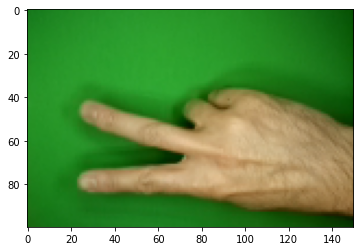

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')

Nama : Tomi Nurhidayat

E-mail : tomi.nurhidayat933@gmail.com

